In [1]:
import numpy as np
import pandas as pd
from imp import reload

import Analyzer
import DataLoader

In [2]:
acc_records = dict(np.load("../file/acc_records_2560_full_256_0.001000_0.010000_32_Sat_Jun_13_11_19_48_2020.npz"))
acc_records

{'train_acc': array([0.24812181, 0.85735751, 0.92507262, 0.97355504, 0.94821196,
        0.95822899, 0.96213563, 0.96784534, 0.98968246, 0.97916458,
        0.98136833, 0.95261945, 0.94240208, 0.96474006, 0.95782831,
        0.9824702 , 0.977061  , 0.98257037, 0.98016628, 0.98497446,
        0.98567565, 0.98397275, 0.97625964, 0.95141741, 0.9595312 ,
        0.98237003, 0.97896424, 0.97585896, 0.99028348, 0.97355504,
        0.97956526, 0.98387258, 0.98417309, 0.99168587, 0.98026645,
        0.98928178, 0.97545828, 0.98377241, 0.93308625, 0.97786237,
        0.98727837, 0.99048382, 0.98557548, 0.98056696, 0.9760593 ,
        0.96884704, 0.98277071, 0.97085045, 0.98667735, 0.98898127,
        0.98307122, 0.98327156, 0.97575879, 0.97816288, 0.98016628,
        0.97495743, 0.9797656 , 0.99288791, 0.97555845, 0.97585896,
        0.97295402, 0.97525794, 0.98807974, 0.98747871, 0.98697786,
        0.95291996, 0.98407292, 0.98026645, 0.977061  , 0.97145147,
        0.97365521, 0.90553942, 0.9

In [3]:
num_epochs = 64

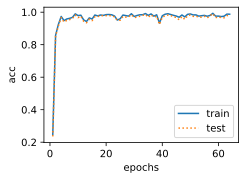

In [4]:
Analyzer.plot(range(1, num_epochs + 1), acc_records["train_acc"][:64], 'epochs', 'acc', 
              range(1, num_epochs + 1), acc_records["valid_acc"][:64], ['train', 'test'])

In [5]:
predict_dic = np.load("../file/predict_dic_2560_full_256_0.001000_0.010000_32_Sat_Jun_13_11_19_48_2020.npz")

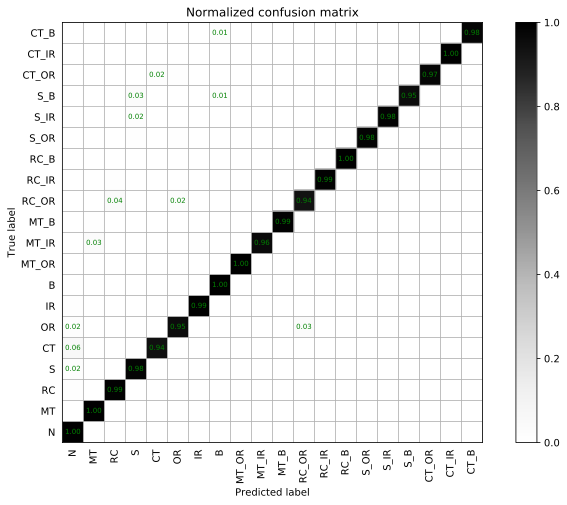

N   MT   RC    S  CT   OR   IR    B  MT_OR  MT_IR  MT_B  RC_OR  \
N      123    0    0    0   0    0    0    0      0      0     0      0   
MT       0  121    0    0   0    0    0    0      0      0     0      0   
RC       1    0  119    0   0    0    0    0      0      0     0      0   
S        2    0    0  116   0    0    0    0      0      0     0      0   
CT       6    0    0    0  98    0    0    0      0      0     0      0   
OR       2    0    0    0   0  123    0    0      0      0     0      4   
IR       1    0    0    0   0    0  142    0      0      0     0      0   
B        0    0    0    0   0    0    0  134      0      0     0      0   
MT_OR    0    0    0    0   0    0    0    0    121      0     0      0   
MT_IR    0    4    0    0   0    0    1    0      0    132     0      0   
MT_B     0    1    0    0   0    0    0    0      0      0   122      0   
RC_OR    0    0    5    0   0    3    0    0      0      0     0    117   
RC_IR    0    0    1    0   0    0    0    0      0      0     0      0   
RC_B     0    0    0    0   0    0    0    0      0      0     0      0   
S_OR     0    0    0    1   0    1    0    0      0      0     0      0   
S_IR     0    0    0    2   0    0    0    0      0      0     0      0   
S_B      0    0    0    4   0    0    0    2      0      0     0      0   
CT_OR    0    0    0    0   2    1    0    0      0      0     0      0   
CT_IR    0    0    0    0   0    0    0    0      0      0     0      0   
CT_B     0    0    0    0   1    0    0    2      0      0     0      0   

       RC_IR  RC_B  S_OR  S_IR  S_B  CT_OR  CT_IR  CT_B  
N          0     0     0     0    0      0      0     0  
MT         0     0     0     0    0      0      0     0  
RC         0     0     0     0    0      0      0     0  
S          0     0     0     0    0      0      0     0  
CT         0     0     0     0    0      0      0     0  
OR         0     0     0     0    0      0      0     0  
IR         0     0     0     0    0      0      0     0  
B          0     0     0     0    0      0      0     0  
MT_OR      0     0     0     0    0      0      0     0  
MT_IR      0     0     0     0    0      0      0     0  
MT_B       0     0     0     0    0      0      0     0  
RC_OR      0     0     0     0    0      0      0     0  
RC_IR    104     0     0     0    0      0      0     0  
RC_B       0   125     0     0    0      0      0     0  
S_OR       0     0   117     0    0      0      0     0  
S_IR       0     0     0   116    0      0      0     0  
S_B        0     0     0     0  128      0      0     0  
CT_OR      0     0     0     0    0    113      0     0  
CT_IR      0     0     0     0    0      0    139     0  
CT_B       0     0     0     0    0      0      0   139

In [6]:
Analyzer.confusion_matrix(predict_dic["y"], (predict_dic["y_hat"] >= 0.5).astype(np.float))

In [7]:
import torch

In [8]:
net = torch.load(r"../file/model_2560_full_256_0.001000_0.010000_32_Sat_Jun_13_14_07_07_2020.pkl", map_location='cpu')
net

WDCNN(
  (conv): Sequential(
    (0): Conv1d(3, 16, kernel_size=(64,), stride=(20,), padding=(22,))
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (13): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): MaxPoo

In [9]:
def partition_train_full(data_dic, label_dic, info, batch_size):
    """数据集划分(数据预处理, 乱序), 在完备数据集上训练
    Args:
        data_dic: dict{str: np.array}
        label_dic: dict{str: np.array}
        info: dict{str: int}
        batch_size: int
    Return:
        train_iter: 训练集数据迭代器
        valid_iter: 验证集数据迭代器
    """
    train_valid_data = np.zeros((info["single_fault_num"] + 
        info["compound_fault_num"], 3, info["signal_len"]))
    train_valid_label = np.zeros((info["single_fault_num"] + 
        info["compound_fault_num"], info["label_len"]))
    # 同时遍历data_dic, label_dic
    index_start = 0
    for key in data_dic:
        index = slice(index_start, index_start + data_dic[key].shape[0])
        train_valid_data[index] = data_dic[key]
        train_valid_label[index] = label_dic[key]
        index_start += data_dic[key].shape[0]
    train_valid_data = torch.from_numpy(train_valid_data)\
                       .type(torch.FloatTensor)
    train_valid_label = torch.from_numpy(train_valid_label)\
                        .type(torch.FloatTensor)
    # shuffle
    perm = torch.randperm(train_valid_data.shape[0])
    train_valid_data = train_valid_data[perm]
    train_valid_label = train_valid_label[perm]
    # radio = train / (train + valid)
    radio = 0.8
    train_index = slice(0, int(radio * train_valid_data.shape[0]))
    valid_index = slice(int(radio * train_valid_data.shape[0]),
                        train_valid_data.shape[0])
    x_train = train_valid_data[train_index]
    y_train = train_valid_label[train_index]
    x_valid = train_valid_data[valid_index]
    y_valid = train_valid_label[valid_index]
    # 数据预处理, 标准化
    mean = x_train.mean()
    std = x_train.std()
    x_train = (x_train - mean) / std
    x_valid = (x_valid - mean) / std
    
    return x_train, y_train, x_valid, y_valid

In [10]:
data_loader = DataLoader.DataLoader()
data_dic, label_dic, info = data_loader.get_frequency_data()

In [11]:
_, _, x_valid, y_valid = partition_train_full(data_dic, label_dic, info, 
                                                  None)

In [12]:
conv0 = net.conv[0](x_valid)
conv1 = net.conv[1](conv0)
conv2 = net.conv[2](conv1)
conv3 = net.conv[3](conv2)
conv4 = net.conv[4](conv3)
conv5 = net.conv[5](conv4)
conv6 = net.conv[6](conv5)
conv7 = net.conv[7](conv6)
conv8 = net.conv[8](conv7)
conv9 = net.conv[9](conv8)
conv10 = net.conv[10](conv9)
conv11 = net.conv[11](conv10)
conv12 = net.conv[12](conv11)
conv13 = net.conv[13](conv12)
conv14 = net.conv[14](conv13)
conv15 = net.conv[15](conv14)
conv16 = net.conv[16](conv15)
conv17 = net.conv[17](conv16)
conv18 = net.conv[18](conv17)
conv19 = net.conv[19](conv18)

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [14]:
columns = [
        "N", # Normal
        "MT", # MissingTooth
        "RC", # RootCrack
        "S", # Surface
        "CT", # ChippedTooth
        "OR", # OuterRace
        "IR", # InnerRace
        "B" # Ball
        ]

In [15]:
label = pd.DataFrame(y_valid.numpy(), columns=columns).astype(int)
label

N  MT  RC  S  CT  OR  IR  B
0     0   0   1  0   0   0   1  0
1     0   0   0  0   0   0   0  1
2     0   0   0  1   0   0   0  0
3     0   0   0  0   0   1   0  0
4     0   0   0  1   0   0   1  0
...  ..  ..  .. ..  ..  ..  .. ..
2491  0   1   0  0   0   0   0  0
2492  0   0   0  0   1   0   0  1
2493  0   0   0  0   0   1   0  0
2494  0   0   0  1   0   0   0  1
2495  0   0   0  0   0   0   0  1

[2496 rows x 8 columns]

In [16]:
label = label.apply(Analyzer.multilabel2str, axis=1)
label

0       RC_IR
1           B
2           S
3          OR
4        S_IR
        ...  
2491       MT
2492     CT_B
2493       OR
2494      S_B
2495        B
Length: 2496, dtype: object

In [17]:
str2int = {
    "N": 0,
    "MT": 1,
    "RC": 2,
    "S": 3,
    "CT": 4,
    "OR": 5,
    "IR": 6,
    "B": 7,
    "MT_OR": 8,
    "MT_IR": 9,
    "MT_B": 10,
    "RC_OR": 11,
    "RC_IR": 12,
    "RC_B": 13,
    "S_OR": 14,
    "S_IR": 15,
    "S_B": 16,
    "CT_OR": 17,
    "CT_IR": 18,
    "CT_B": 19,
}

In [18]:
label = label.apply(lambda x: str2int[x])
label

0       12
1        7
2        3
3        5
4       15
        ..
2491     1
2492    19
2493     5
2494    16
2495     7
Length: 2496, dtype: int64

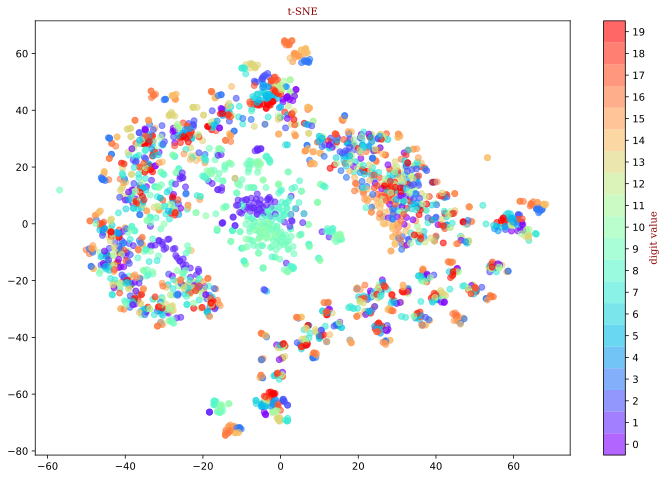

In [26]:
tsne = TSNE()
x_tsne = tsne.fit_transform(x_valid.detach().numpy().reshape(2496, -1))
font = {"color": "darkred",
        "size": 10, 
        "family" : "serif"}
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=label, alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 20))
plt.title("t-SNE", fontdict=font)
cbar = plt.colorbar(ticks=range(20)) 
cbar.set_label(label='digit value', fontdict=font)
plt.clim(-0.5, 19.5)

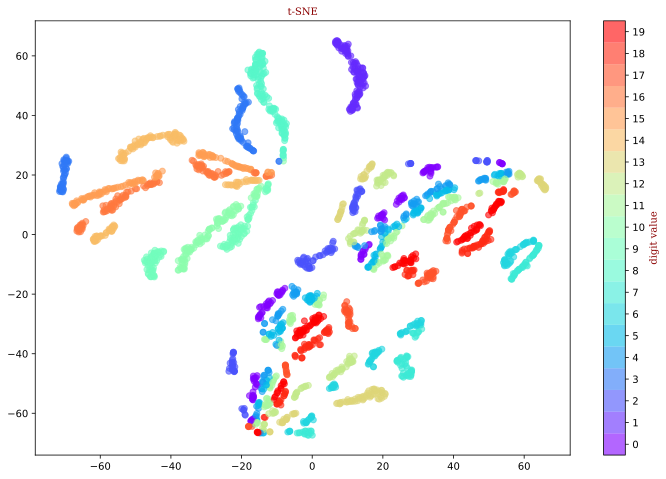

In [19]:
tsne = TSNE()
x_tsne = tsne.fit_transform(conv3.detach().numpy().reshape(2496, -1))
font = {"color": "darkred",
        "size": 10, 
        "family" : "serif"}
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=label, alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 20))
plt.title("t-SNE", fontdict=font)
cbar = plt.colorbar(ticks=range(20)) 
cbar.set_label(label='digit value', fontdict=font)
plt.clim(-0.5, 19.5)

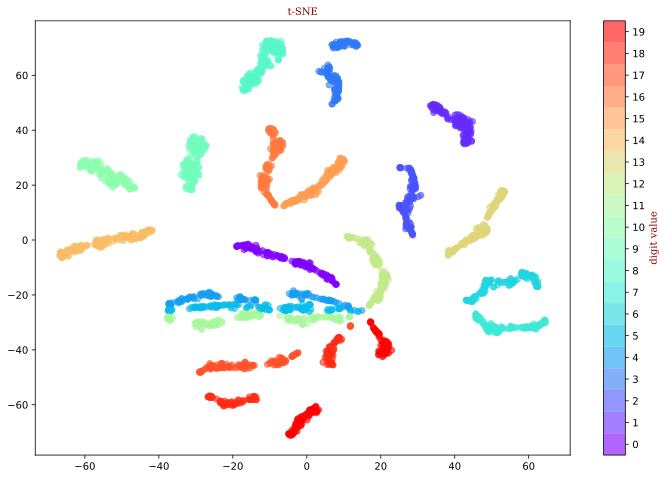

In [20]:
tsne = TSNE()
x_tsne = tsne.fit_transform(conv7.detach().numpy().reshape(2496, -1))
font = {"color": "darkred",
        "size": 10, 
        "family" : "serif"}
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=label, alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 20))
plt.title("t-SNE", fontdict=font)
cbar = plt.colorbar(ticks=range(20)) 
cbar.set_label(label='digit value', fontdict=font)
plt.clim(-0.5, 19.5)

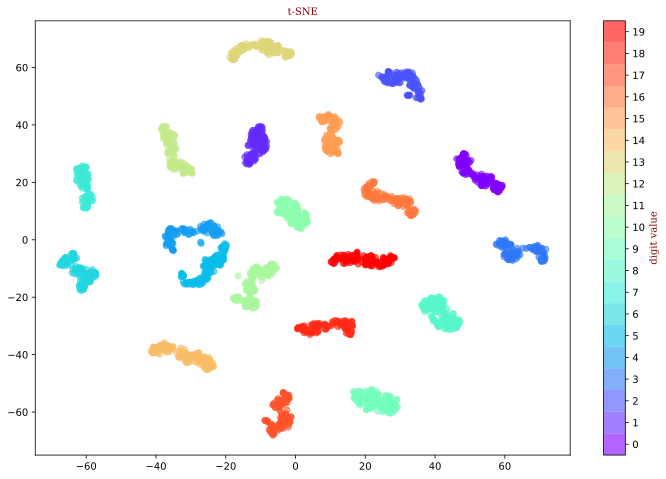

In [21]:
tsne = TSNE()
x_tsne = tsne.fit_transform(conv11.detach().numpy().reshape(2496, -1))
font = {"color": "darkred",
        "size": 10, 
        "family" : "serif"}
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=label, alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 20))
plt.title("t-SNE", fontdict=font)
cbar = plt.colorbar(ticks=range(20)) 
cbar.set_label(label='digit value', fontdict=font)
plt.clim(-0.5, 19.5)

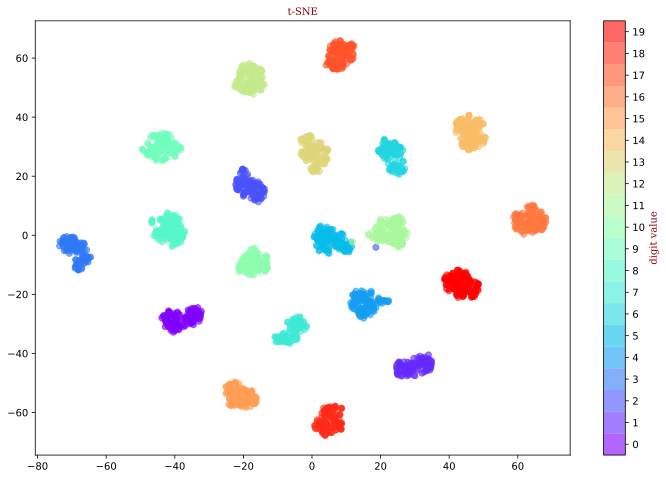

In [22]:
tsne = TSNE()
x_tsne = tsne.fit_transform(conv15.detach().numpy().reshape(2496, -1))
font = {"color": "darkred",
        "size": 10, 
        "family" : "serif"}
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=label, alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 20))
plt.title("t-SNE", fontdict=font)
cbar = plt.colorbar(ticks=range(20)) 
cbar.set_label(label='digit value', fontdict=font)
plt.clim(-0.5, 19.5)

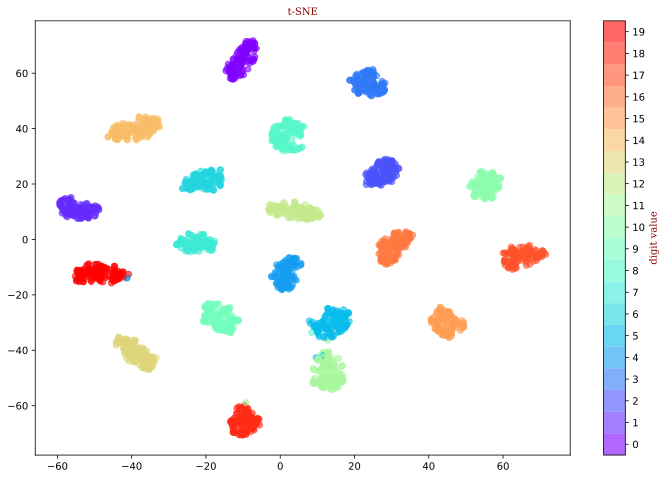

In [23]:
tsne = TSNE()
x_tsne = tsne.fit_transform(conv19.detach().numpy().reshape(2496, -1))
font = {"color": "darkred",
        "size": 10, 
        "family" : "serif"}
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=label, alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 20))
plt.title("t-SNE", fontdict=font)
cbar = plt.colorbar(ticks=range(20)) 
cbar.set_label(label='digit value', fontdict=font)
plt.clim(-0.5, 19.5)

In [24]:
def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
#                  color=plt.cm.Set1(label[i] / 10.),
#                  fontdict={'weight': 'bold', 'size': 9}
                )
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig

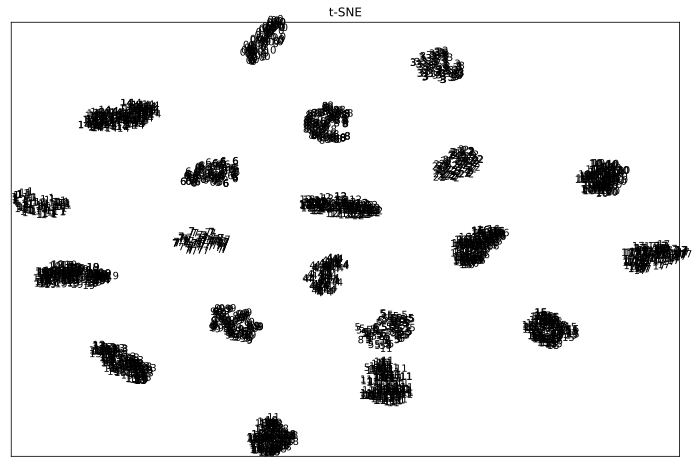

In [25]:
fig = plot_embedding(x_tsne, label, "t-SNE")